In [10]:
# !apt-get install libcairo2-dev libjpeg-dev libgif-dev #Obviamente este en windows no funcionará
# !pip install pycairo
# !pip install igraph
# !pip install python-louvain

# !pip install bbox

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm

import pandas as pd

import igraph as ig
from community import community_louvain as com

import cairo # Importo Cairo
import bbox
# Esto es para que funcione Cairo
from IPython.display import SVG, display, Image
def show_svg(file):
    display(SVG(filename=file))

import inspect
import statistics as st
import itertools
from functools import reduce
import operator as op

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]


def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)    
    return data

In [13]:
G = nx.read_gml('TC05_Data/dolphins.gml')

# Ejercicio 1


## Item A: Partición en comunidades usando Louivan, infomap, fast greedy y betweenness

In [8]:
# Función para llevar el objeto vertex cluster a diccionario
def cluster_to_dict(cluster, g):
    dic = {}
    for i, c in enumerate(sorted(list(cluster), key = len, reverse = True)):
        for n in c:
            dic[g.vs[n]['_nx_name']] = i
    return dic

In [14]:
# tomo cada algoritmo 

G_ig = ig.Graph.from_networkx(G)  #grafo de data delfin

# Louivan
com_lv = com.best_partition(G)
# infomap
com_im = G_ig.community_infomap()
# fastgreedy
com_fg = G_ig.community_fastgreedy(weights = None)
# betweenness
com_bt = G_ig.community_edge_betweenness()

In [15]:
for comu in [com_lv, com_im, com_fg, com_bt]:
 # Cantidad de elementos y de mergeos hechos
	if comu == com_im:
		print('Infomap')
		print(comu.summary())
		print(f'La cantidad de comunas que maximiza la modularidad es: {len(com_im)}')
		print(f'La modularidad de dicha partición es: {comu.modularity}')
		print(f'La separación en comunas, considerando 5 comunidades es: \n {comu}')

	elif comu == com_lv:
		print('Louvain')
		print(f'La cantidad de comunas que maximiza la modularidad es: {max(comu.values()) + 1}')
		print(f'La modularidad de dicha partición es: {com.modularity(com_lv, G)}')
		# Agrupamos los nodos por comunidad
		comunidades = {}
		for nodo, comunidad in comu.items():
			if comunidad not in comunidades:
				comunidades[comunidad] = []
			comunidades[comunidad].append(nodo)

		# Imprimimos las comunidades en el formato solicitado
		for comunidad, nodos in comunidades.items():
			print(f'[{comunidad}] {", ".join(nodos)}')

	else: 
		if comu == com_fg:
			print('Fast Greedy')
		elif comu == com_bt:
			print('Edge Betweenness')
		print(comu)
		print(f'La cantidad de comunas que maximiza la modularidad es: {comu.optimal_count}')
		print(f'La modularidad de dicha partición es: {comu.as_clustering().modularity}')
		print(f'La separación en comunas, considerando 5 comunidades es: \n {comu.as_clustering()}')
	print(f'------------')

Louvain
La cantidad de comunas que maximiza la modularidad es: 5
La modularidad de dicha partición es: 0.5188283691309679
[0] Beak, Bumper, DN63, Fish, Knit, PL, SN96, TR77
[4] Beescratch, DN16, DN21, Feather, Gallatin, Jet, MN23, Mus, Notch, Number1, Quasi, Ripplefluke, SN90, TR82, Upbang, Wave, Web, Zig
[2] CCL, Double, Oscar, SN100, SN89, Zap
[3] Cross, Five, Haecksel, Jonah, MN105, MN60, MN83, Patchback, SMN5, Topless, Trigger, Vau
[1] Fork, Grin, Hook, Kringel, Scabs, Shmuddel, SN4, SN63, SN9, Stripes, Thumper, TR120, TR88, TR99, TSN103, TSN83, Whitetip, Zipfel
------------
Infomap
Clustering with 62 elements and 6 clusters
La cantidad de comunas que maximiza la modularidad es: 6
La modularidad de dicha partición es: 0.5189470353229697
La separación en comunas, considerando 5 comunidades es: 
 Clustering with 62 elements and 6 clusters
[0] 0, 2, 10, 42, 47
[1] 1, 7, 19, 25, 26, 27, 28, 30
[2] 3, 8, 36, 39, 59
[3] 4, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55
[4] 5, 6, 9, 13, 17, 2

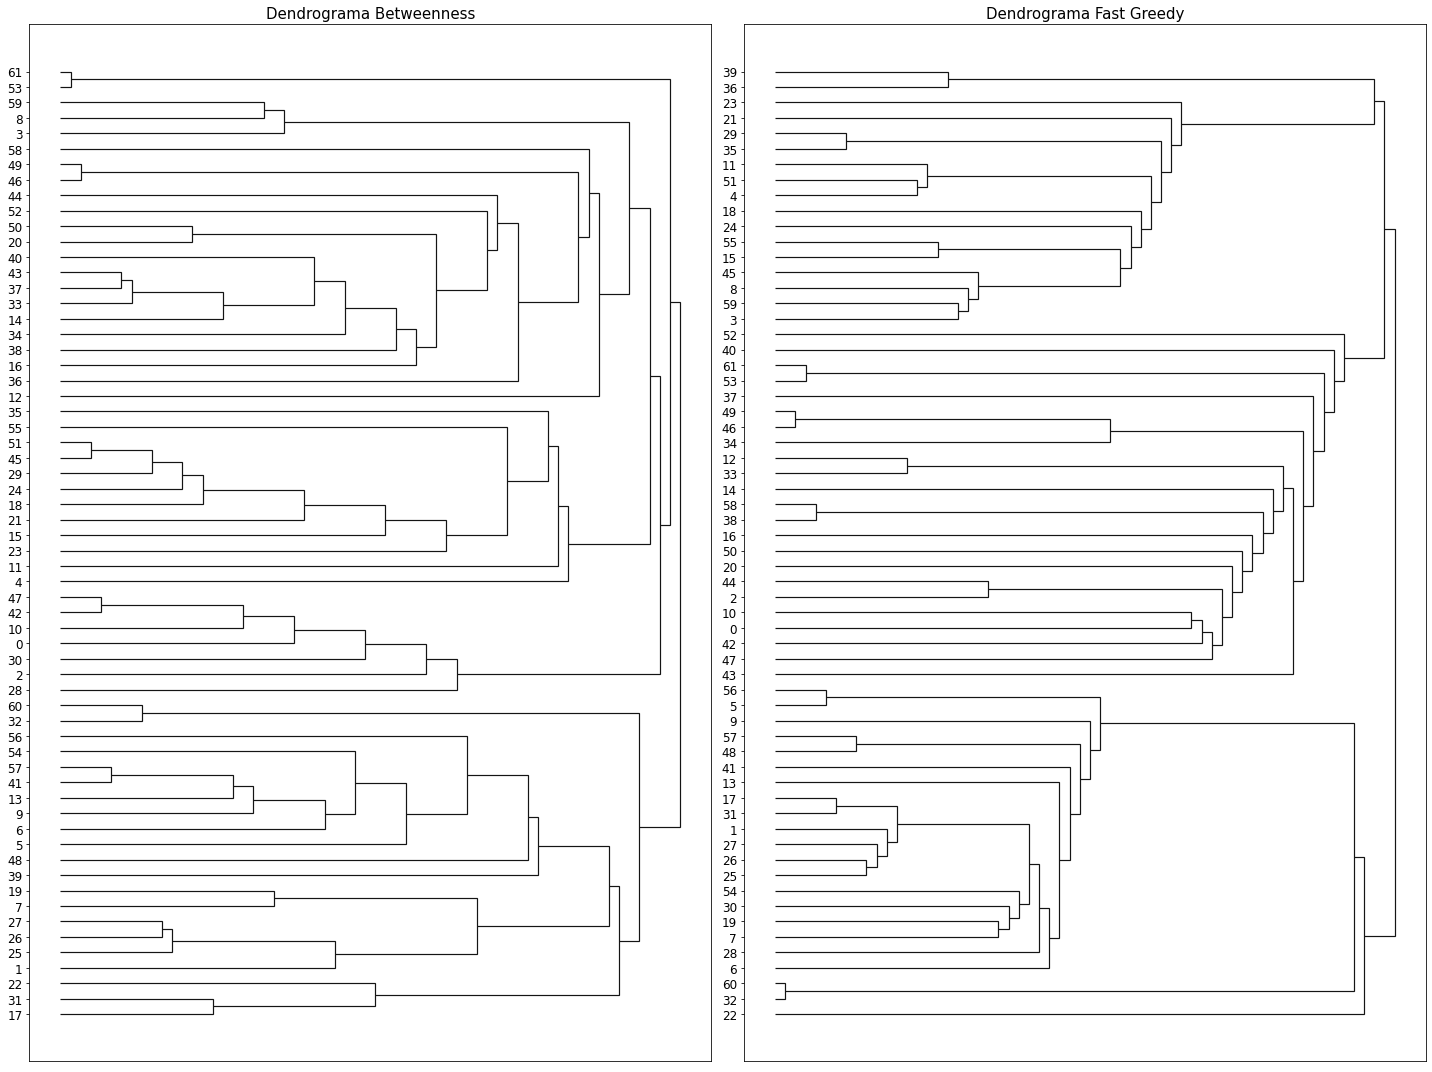

In [16]:
# Dendograma de betweenness y fastgreedy
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))

# Dendrograma Betweenness
dendrogram = com_bt.__plot__('matplotlib', context=ax[0], orientation='lr', color='#141414', lw=1.2)
ax[0].set_title('Dendrograma Betweenness', loc='center', fontsize=15, color='k')
ax[0].tick_params(axis='y', labelsize=12)  
ax[0].set_frame_on(True)  

# Dendrograma Fast Greedy
dendrogram = com_fg.__plot__('matplotlib', context=ax[1], orientation='lr', color='#141414', lw=1.2)
ax[1].set_title('Dendrograma Fast Greedy', loc='center', fontsize=15, color='k')
ax[1].tick_params(axis='y', labelsize=12) 
ax[1].set_frame_on(True) 

plt.tight_layout()

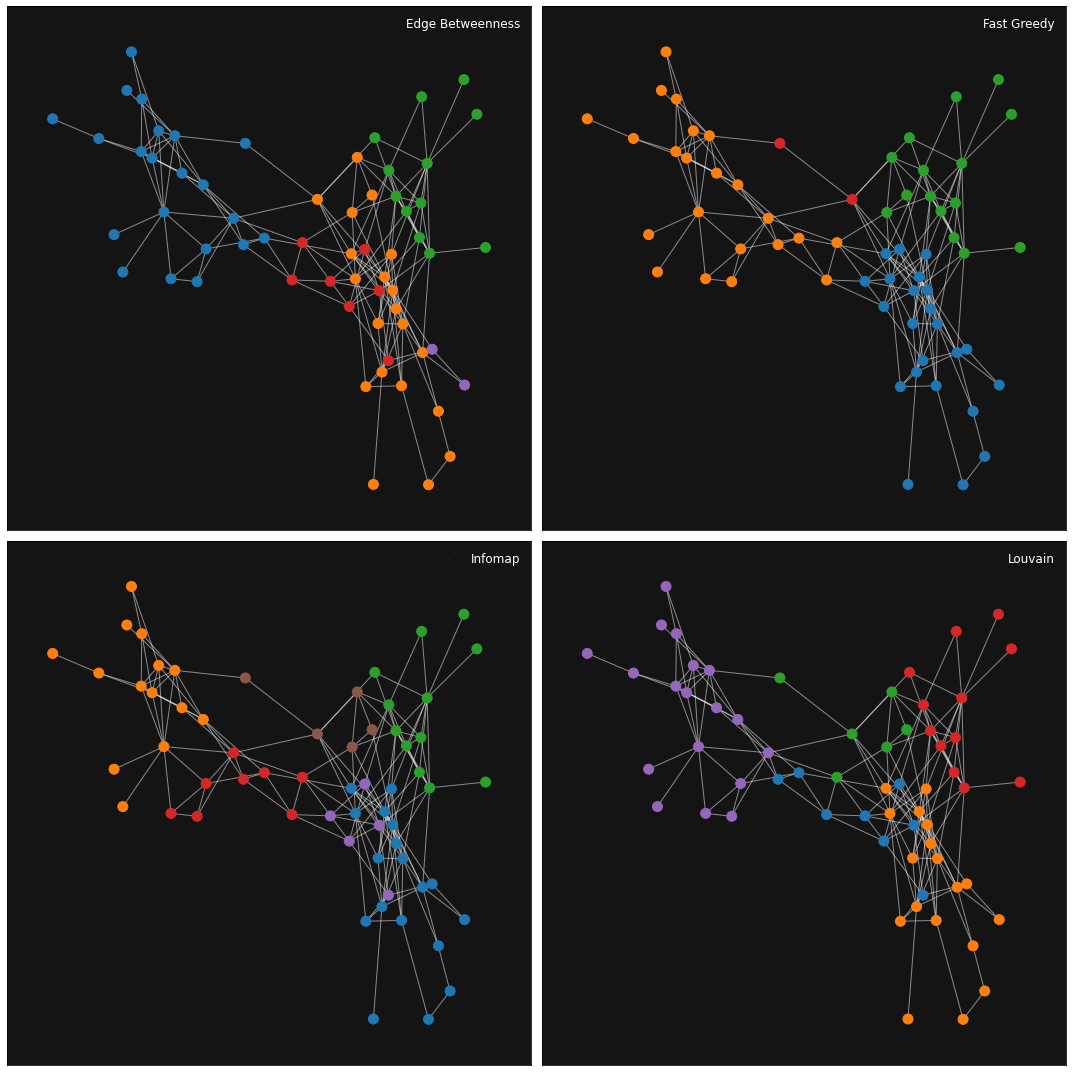

In [17]:
# Red clusterizada

# Creo un diccionario con los nombres de los nodos como keys y los clusters como values
pos = nx.layout.fruchterman_reingold_layout(G)

dic_com_bt = cluster_to_dict(com_bt.as_clustering(), G_ig) # edge_betweennees
dic_com_fg = cluster_to_dict(com_fg.as_clustering(), G_ig) # fast_greedy
dic_com_im = cluster_to_dict(com_im, G_ig) # infomap

particiones = [dic_com_bt, dic_com_fg, dic_com_im, com_lv]

fig, axs = plt.subplots(2, 2, figsize = (15, 15))
titles = ['Edge Betweenness', 'Fast Greedy', 'Infomap', 'Louvain']

for i, ax in enumerate(fig.axes):
	ax.set_facecolor('#141414')  # Cambiar color de background
	nx.draw_networkx_nodes(G,
						   pos = pos,
						   node_color = [plt.get_cmap('tab10')(particiones[i][v]) for v in G.nodes()],
						   ax = ax,
						   node_size = 100)
	nx.draw_networkx_edges(G, pos = pos, ax = ax, alpha = .5, edge_color = 'white')
	ax.axis('on')

	ax.legend([titles[i]], loc='upper right', frameon=False, fontsize=12, labelcolor='white', markerscale=0.01)
    

plt.tight_layout()
plt.show()

## Item B: Caracterice las particiones, modularidad y silouhette score. 
Comparar los valores esperados en redes recableadas y establezca si tiene derecho a llamar modular a esta red.

In [18]:
#Definamos una función que, dada una red y una partición, nos devuelva un plot del clustering de cada nodo

def silhouette(Red,particion): # La función nos pide la Red y la partición como diccionario
  S=[]
  limites=[0]
  # Recorro los clusters sin repetir
  for cluster in set(particion.values()):
    #Filtro los nodos que pertenecen a este cluster
    nodos_en_cluster = [nodo for (nodo, value) in particion.items() if value == cluster]
    S_cluster=[]
    # Recorro los nodos del cluster
    for nodo in nodos_en_cluster:
      distancias_dentro=[]
      distancias_fuera=[]
      # Recorro los nodos del mismo cluster
      for nodo_en_cluster in nodos_en_cluster:
        if nodo != nodo_en_cluster:
          # Calculo y guardo la distancia, si no es consigo mismo
          distancias_dentro.append(nx.shortest_path_length(Red, source=nodo, target=nodo_en_cluster, weight=None))
      # Recorro los nodos de los otros clusters
      for nodo_fuera in Red.nodes():
        if particion[nodo_fuera] != cluster:
          # Calculo y guardo la distancia
          distancias_fuera.append(nx.shortest_path_length(Red, source=nodo, target=nodo_fuera, weight=None))
      # Calculo la distancia media para los del mismo cluster
      distancia_media_dentro = np.mean(distancias_dentro)
      # Calculo la distancia mínima para los nodos fuera del cluster
      distancia_mean_fuera = np.mean(distancias_fuera)
      # Calculo y guardo la Silhouette del nodo
      S_cluster.append((distancia_mean_fuera - distancia_media_dentro)/np.max([distancia_mean_fuera,distancia_media_dentro]))
    # Ordeno las Silhouette del mismo cluster por valor, para graficar lindo
    S_cluster=sorted(S_cluster)
    # Me guardo en qué nodo termina cada cluster, para graficar clusters por colores
    limites.append(len(S_cluster)+limites[-1])
    # Agrego las Silhouette de este cluster a la lista de todas
    S = S + S_cluster
  # Calculo la Silhouette media
  S_media = np.mean(S)

  return limites, S, S_media

def dict_to_vc(com_dict):
    v, c = np.unique(list(com_dict.values()),return_counts = True)
    return v, c

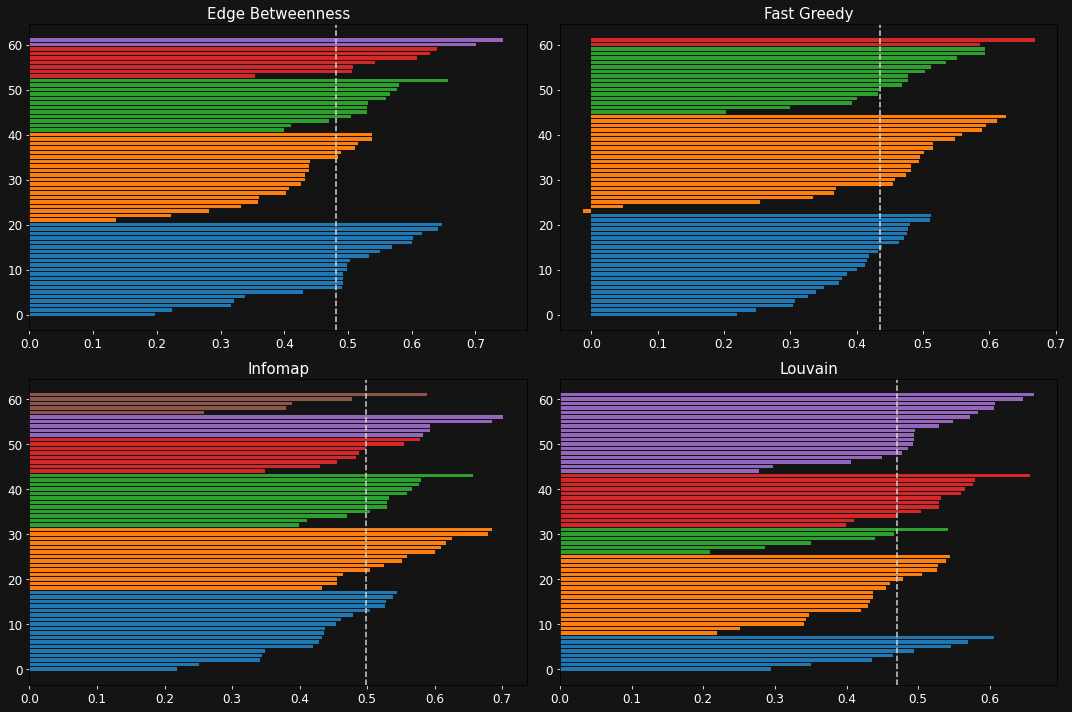

In [19]:
#Silhouette plots

# Grafico todas con colores por clusters
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.set_facecolor('#141414')

limites1, s1, s_media1 = silhouette(G, dic_com_bt)
limites2, s2, s_media2 = silhouette(G, dic_com_fg)

limites3, s3, s_media3 = silhouette(G, dic_com_im)
limites4, s4, s_media4 = silhouette(G, com_lv)

lim = [[limites1, limites2], [limites3, limites4]]
ss = [[s1, s2], [s3, s4]]
s_means = [[s_media1, s_media2], [s_media3, s_media4]]

titles_bars = [['Edge Betweenness', 'Fast Greedy'], ['Infomap', 'Louvain']]
axss = [[0,0], [0,1], [1,0], [1,1]]

cmap = plt.get_cmap('tab10')

for a in axss:
	limites = lim[a[0]][a[1]]
	s = ss[a[0]][a[1]]
	axxs = ax[a[0],a[1]]
	s_media = s_means[a[0]][a[1]]
	axxs.tick_params(axis='x', labelsize=12, colors='white')
	axxs.tick_params(axis='y', labelsize=12, colors='white')

	axxs.set_facecolor('#141414')

	for i in range(len(limites)-1):
		axxs.barh(range(limites[i],limites[i+1]), s[limites[i]:limites[i+1]], color=cmap(i % 10))
	axxs.axvline(s_media, ls='dashed', color='lightgray')
	axxs.set_title(titles_bars[a[0]][a[1]], fontsize=15, color='white')

fig.tight_layout()

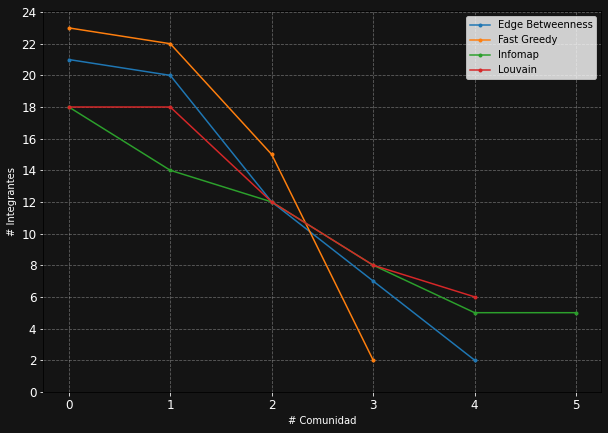

In [20]:
# Granularidad
particiones = [dic_com_bt, dic_com_fg, dic_com_im, com_lv]
titles = ['Edge Betweenness', 'Fast Greedy', 'Infomap', 'Louvain']

fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (10, 7))
fig.set_facecolor('#141414')
ax.set_facecolor('#141414')
ax.tick_params(axis='x', labelsize=12, colors='white')
ax.tick_params(axis='y', labelsize=12, colors='white')


for jj in range(len(particiones)):
    dic = particiones[jj]
    v, c  = dict_to_vc(dic)
    ax.plot(range(len(c)), sorted(c, reverse = True), marker = '.', label = titles[jj])
    plt.xlabel('# Comunidad', color = 'white')	
    plt.ylabel('# Integrantes', color = 'white')

plt.yticks(range(0, 25, 2))
plt.grid(True, linestyle = '--', alpha = .5)
plt.legend()

In [21]:
# Veo nuevamente modularidad

for comu in [com_lv, com_im, com_fg, com_bt]:
	if comu == com_im:
		print('Infomap')
		print(f'La modularidad de dicha partición es: {comu.modularity}')

	elif comu == com_lv:
		print('Louvain')
		print(f'La modularidad de dicha partición es: {com.modularity(com_lv, G)}')

	else: 
		if comu == com_fg:
			print('Fast Greedy')
		elif comu == com_bt:
			print('Edge Betweenness')
		print(f'La modularidad de dicha partición es: {comu.as_clustering().modularity}')
	print(f'------------')

Louvain
La modularidad de dicha partición es: 0.5188283691309679
------------
Infomap
La modularidad de dicha partición es: 0.5189470353229697
------------
Fast Greedy
La modularidad de dicha partición es: 0.4954906847039279
------------
Edge Betweenness
La modularidad de dicha partición es: 0.5193821446936434
------------


In [22]:
dic_modularidad = {'Edge Betweenness': com_bt.as_clustering().modularity, 'Fast Greedy': com_fg.as_clustering().modularity, 'Infomap': com_im.modularity, 'Louvain': com.modularity(com_lv, G)}
dic_modularidad

{'Edge Betweenness': 0.5193821446936434,
 'Fast Greedy': 0.4954906847039279,
 'Infomap': 0.5189470353229697,
 'Louvain': 0.5188283691309679}

### comparo con recableado

In [23]:
def armar_listas_por_comunidades(particion_diccionario):
  listas_nodos_particiones = []
  comunidades = 0
  lista_comunidad = []
  for nodo in particion_diccionario.keys():
    if particion_diccionario[nodo] == comunidades:
      lista_comunidad.append(nodo)
    else:
      comunidades+=1
      listas_nodos_particiones.append(lista_comunidad)
      lista_comunidad = [nodo]
  listas_nodos_particiones.append(lista_comunidad)
  return listas_nodos_particiones

def calcular_modularidad(Red,particion_diccionario):
  listas_por_comunidades = armar_listas_por_comunidades(particion_diccionario)
  enlaces = len(Red.edges())
  enlaces_en_comunidad = []
  suma_grados_comunidad_2 = []
  for i in range(len(listas_por_comunidades)):
    enlaces_en_comunidad.append(len(Red.subgraph(listas_por_comunidades[i]).edges()))
    suma_grados_comunidad_2.append(sum([grado for nodo, grado in Red.degree(listas_por_comunidades[i])])**2)
  return sum(enlaces_en_comunidad)/enlaces - (sum(suma_grados_comunidad_2)/(4*enlaces**2))

In [24]:
def convertir_particion_igraph_a_diccionario(Red_igraph,particion_igraph):
  particion_dict = {}
  for cluster in range(len(particion_igraph)):
    for nodo in Red_igraph.vs(particion_igraph[cluster])['name']:
      particion_dict.update({nodo:cluster})
  return particion_dict

In [25]:
S = 30

RedRecableada = G

modularidad_im, modularidad_bt, modularidad_fg, modularidad_lv = [], [], [], []

for i in range(100):

	nx.double_edge_swap(RedRecableada, nswap=S , max_tries=100)

	RedRecableada_igraph = ig.Graph.TupleList(G.edges(), directed=False)
	
	particion_edge_betw_igraph = RedRecableada_igraph.community_edge_betweenness().as_clustering()
	particion_fast_greedy_igraph = RedRecableada_igraph.community_fastgreedy().as_clustering()
	particion_infomap_igraph = RedRecableada_igraph.community_infomap()
	particion_louvain_R = com.best_partition(RedRecableada) #Este ya es un diccionario

	#convertimos las particiones de igraph en diccionarios: 
	particion_fast_greedy_R = convertir_particion_igraph_a_diccionario(RedRecableada_igraph, particion_fast_greedy_igraph)
	particion_edge_betw_R = convertir_particion_igraph_a_diccionario(RedRecableada_igraph, particion_edge_betw_igraph)
	particion_infomap_R = convertir_particion_igraph_a_diccionario(RedRecableada_igraph, particion_infomap_igraph)

	modularidad_im.append(calcular_modularidad(RedRecableada, particion_infomap_R))
	modularidad_bt.append(calcular_modularidad(RedRecableada, particion_edge_betw_R))
	modularidad_fg.append(calcular_modularidad(RedRecableada, particion_fast_greedy_R))
	modularidad_lv.append(calcular_modularidad(RedRecableada, particion_louvain_R))

In [403]:
str(np.round(dic_modularidad['Louvain'], 4))

'0.5196'

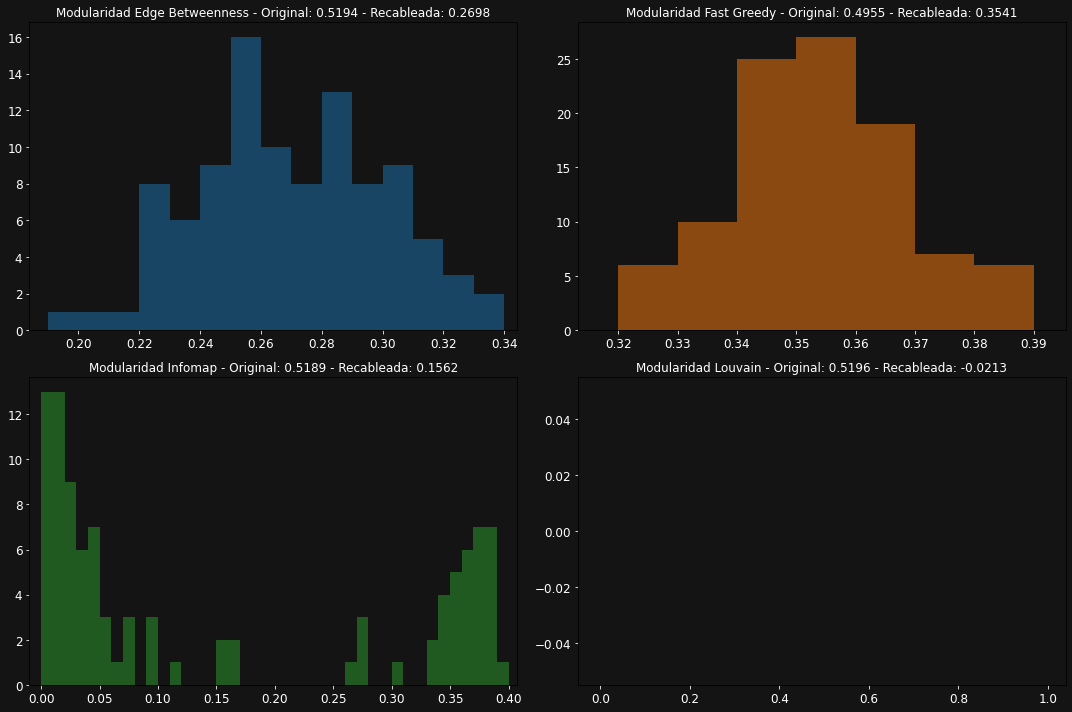

In [411]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.set_facecolor('#141414')
bins = np.arange(0, 1, 0.01)

# Modularidad Edge Betweenness
axs[0, 0].hist(modularidad_bt, bins=bins, alpha=0.5, color=plt.get_cmap('tab10')(0))
axs[0, 0].set_xlim([min(modularidad_bt)-0.01, max(modularidad_bt)+0.01])
axs[0, 0].set_title('Modularidad Edge Betweenness - Original: ' + str(np.round(dic_modularidad['Edge Betweenness'], 4)) + ' - Recableada: ' + str(np.round(st.mean(modularidad_bt), 4)), color='white')

# Modularidad Fast Greedy
axs[0, 1].hist(modularidad_fg, bins=bins, alpha=0.5, color=plt.get_cmap('tab10')(1))
axs[0, 1].set_xlim([min(modularidad_fg)-0.01, max(modularidad_fg)+0.01])
axs[0, 1].set_title('Modularidad Fast Greedy - Original: ' + str(np.round(dic_modularidad['Fast Greedy'], 4)) + ' - Recableada: ' + str(np.round(st.mean(modularidad_fg), 4)), color='white')

# Modularidad Infomap
axs[1, 0].hist(modularidad_im, bins=bins, alpha=0.5, color=plt.get_cmap('tab10')(2))
axs[1, 0].set_xlim([min(modularidad_im)-0.01, max(modularidad_im)+0.01])
axs[1, 0].set_title('Modularidad Infomap - Original: ' + str(np.round(dic_modularidad['Infomap'], 4)) + ' - Recableada: ' + str(np.round(st.mean(modularidad_im), 4)), color='white')

# Modularidad Louvain
axs[1, 1].hist(modularidad_lv, bins=bins, alpha=0.5, color=plt.get_cmap('tab10')(3))
# axs[1, 1].set_xlim([min(modularidad_lv)-0.01, max(modularidad_lv)+0.01])
axs[1, 1].set_title('Modularidad Louvain - Original: ' + str(np.round(dic_modularidad['Louvain'], 4)) + ' - Recableada: ' + str(np.round(st.mean(modularidad_lv), 4)), color='white')

for axx in axs.flat:
	axx.set_facecolor('#141414')
	axx.tick_params(axis='x', labelsize=12, colors='white')
	axx.tick_params(axis='y', labelsize=12, colors='white')
    
plt.tight_layout()
plt.show()

In [413]:
#Reciclo lo del tp1
def p_valor(valor_test, histo_azar, NumBin=20):
    lins = np.linspace(min(histo_azar), max(histo_azar), NumBin)
    Ancho = lins[1] - lins[0]

    h, b = np.histogram(histo_azar, bins=lins)  #Histograma de histo_azar de las iteraciones
    h = h / sum(h) #Normalizo

    ListaPValor = []

    # Calculo la media de histo_azar para saber si tomo el area de la coda izq o der
    media = np.mean(histo_azar)

    if valor_test < media:
        # Calcular el p-valor sumando las áreas a la izquierda de valor_test
        for k in range(len(h)):
            if b[k] <= valor_test < b[k+1]:
                ListaPValor.append(Ancho * h[k])
            elif b[k] < valor_test:
                ListaPValor.append(Ancho * h[k])
    else:
        # Calcular el p-valor sumando las áreas a la derecha de valor_test
        for k in range(len(h)):
            if b[k] <= valor_test < b[k+1]:
                ListaPValor.append(Ancho * h[k])
            elif b[k] > valor_test:
                ListaPValor.append(Ancho * h[k])

    PValor = sum(ListaPValor)

    return PValor

In [419]:
ParticionesP = [modularidad_bt, modularidad_fg, modularidad_im, modularidad_lv]
Ref = [dic_modularidad['Edge Betweenness'], dic_modularidad['Fast Greedy'], dic_modularidad['Infomap'], dic_modularidad['Louvain']]

PValores = []
for q in range(len(ParticionesP)):
	NumBin = 100

	ListaPValor = []

	for i in range(len(Ref)):
		PValor = p_valor(Ref[i], ParticionesP[q], NumBin)
		ListaPValor.append(PValor)

dic_pvalores = {'Edge Betweenness': ListaPValor[0], 'Fast Greedy': ListaPValor[1], 'Infomap': ListaPValor[2], 'Louvain': ListaPValor[3]}
print('p-valores: ', dic_pvalores)

p-valores:  {'Edge Betweenness': 0, 'Fast Greedy': 0, 'Infomap': 0, 'Louvain': 0}


## Item C: Caracterice cuantitativamente el acuerdo entre las particiones obtenidas utilizando uno o más de los observables vistos en clase.

In [420]:
from sklearn.metrics import normalized_mutual_info_score as nmis

In [425]:
dic_particiones = {'Edge Betweenness': dic_com_bt, 'Fast Greedy': dic_com_fg, 'Infomap': dic_com_im, 'Louvain': com_lv}

In [439]:
dic_particiones.keys()

dict_keys(['Edge Betweenness', 'Fast Greedy', 'Infomap', 'Louvain'])

In [449]:
# Comparo con informacion mutua

dic_resultado = {}
for k1 in dic_particiones.keys():
	for k2 in dic_particiones.keys():
		if (k1 != k2 ) and (f'{k2} - {k1}' not in dic_resultado):

			resultado = nmis([dic_particiones[k1][n] for n in G.nodes()],
							 [dic_particiones[k2][n] for n in G.nodes()])
			
			dic_resultado[f'{k1} - {k2}'] = resultado
			print(f'Comparando {k1} - {k2}: {resultado}')

# Normalized Mutual Information (NMI) is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation)

Comparando Edge Betweenness - Fast Greedy: 0.6621479706254773
Comparando Edge Betweenness - Infomap: 0.7718114436794679
Comparando Edge Betweenness - Louvain: 0.7850732905548763
Comparando Fast Greedy - Infomap: 0.7903940510369141
Comparando Fast Greedy - Louvain: 0.7812224624245646
Comparando Infomap - Louvain: 0.9503495750078393


## Item D: Analice cuantitativamente la relación entre el género de los delfines y la estructura de comunidades del grupo. 
Puede utilizar para ello, por ejemplo, tests de sobre-representación y/o sub-representación (puede usar el test de Fisher). 
¿Qué hipótesis puede aventurar sobre propiedades comportamentales de este grupo de delfines a partir de lo encontrado?

In [548]:
G = nx.read_gml('TC05_Data/dolphins.gml')

In [572]:
G_igraph = ig.Graph.TupleList(G.edges(), directed=False)
dendograma_edge_betweenness = G_igraph.community_edge_betweenness(clusters=None, directed=False, weights=None)
dendograma_fast_greedy = G_igraph.community_fastgreedy(weights=None)

particion_edge_betw_igraph = G_igraph.community_edge_betweenness().as_clustering()
particion_fast_greedy_igraph = G_igraph.community_fastgreedy().as_clustering()
particion_infomap_igraph = G_igraph.community_infomap()
particion_louvain_igraph = G_igraph.community_multilevel()
particion_louvain = com.best_partition(RedRecableada) #Este ya es un diccionario

#convertimos todas las particiones en diccionarios: 
particion_fast_greedy = convertir_particion_igraph_a_diccionario(G_igraph,particion_fast_greedy_igraph)
particion_edge_betw = convertir_particion_igraph_a_diccionario(G_igraph,particion_edge_betw_igraph)
particion_infomap = convertir_particion_igraph_a_diccionario(G_igraph,particion_infomap_igraph)

# vemos cuantas comunidades hay:
print('La partición optima para Infomap tiene '+str(max(particion_infomap.values())+1)+' comunidades')
print('La partición optima para Louvain tiene '+str(max(particion_louvain.values())+1)+' comunidades')
print('La partición optima para Edge Betw tiene '+str(dendograma_edge_betweenness.optimal_count)+' comunidades')
print('La partición optima para fast greedy tiene '+str(dendograma_fast_greedy.optimal_count)+' comunidades')

La partición optima para Infomap tiene 6 comunidades
La partición optima para Louvain tiene 5 comunidades
La partición optima para Edge Betw tiene 5 comunidades
La partición optima para fast greedy tiene 4 comunidades


In [573]:
#combinatoria
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer/denom
#probabilidad
def proba(a,b,tot,tot_M,tot_H):
    p=(ncr(tot_M,a))*(ncr(tot_H,b))/(ncr(tot,a+b)) 
    return p

In [574]:
dol_lista_de_enlaces = abrir_txt('TC05_Data/dolphinsGender.txt')
gender = [row[1] for row in dol_lista_de_enlaces]
node_ids = list(G.nodes)
attributes_dict = dict(zip(node_ids, gender))
nx.set_node_attributes(G, values=attributes_dict, name='Sexo')

In [575]:
# Contar nodos con atributo 'f'
count_f = sum(1 for _, attr in G.nodes(data=True) if attr.get('Sexo') == 'f')
count_m = sum(1 for _, attr in G.nodes(data=True) if attr.get('Sexo') == 'm')
count_n = sum(1 for _, attr in G.nodes(data=True) if attr.get('Sexo') == 'NA')

prop_M = count_f/G.number_of_nodes()
prop_H = count_m/G.number_of_nodes()
prop_N = count_n/G.number_of_nodes()

In [604]:
diccionarios_particiones =[particion_edge_betw,particion_fast_greedy,particion_infomap,particion_louvain]
igraphs_particiones =[particion_edge_betw_igraph,particion_fast_greedy_igraph,particion_infomap_igraph,particion_louvain_igraph]

metodos=["Edge Betweenness","Fast Greedy","Infomap","Louvain"]
Datos = {node: data['Sexo'] for node, data in G.nodes(data=True)}

diccionario_salida = {}
for metodo, dict_particion, igraph_particion in zip(metodos, diccionarios_particiones, igraphs_particiones):
	Comunidades = len(igraph_particion)
	for comunidad in range(Comunidades):
		M, H, N = 0, 0, 0

		for value in Datos:
			if dict_particion[value] == comunidad:
				if Datos[value] == 'm':
					M += 1
				elif Datos[value] == 'f':
					H += 1
				else:
					N += 1

		p = proba(M, H, G.number_of_nodes(), count_f, count_m)
		comunidad_str = 'Comunidad' + str(comunidad)
		
		if metodo not in diccionario_salida:
			diccionario_salida[metodo] = {}
		
		diccionario_salida[metodo][comunidad_str] = {'Machos': M, 'Hembras': H, 'NA': N, 'Probabilidad': p}


In [609]:
df = pd.DataFrame.from_dict({(outer_key, inner_key): values 
                             for outer_key, inner_dict in diccionario_salida.items() 
                             for inner_key, values in inner_dict.items()},
                            orient='index')

df

Machos  Hembras  NA  Probabilidad
Edge Betweenness Comunidad0       4        3   0      0.129293
                 Comunidad1      14        6   0      0.000287
                 Comunidad2       5        6   1      0.112467
                 Comunidad3      10        8   3      0.019258
                 Comunidad4       1        1   0      0.431518
Fast Greedy      Comunidad0      16        8   0      0.000138
                 Comunidad1       7        7   1      0.064029
                 Comunidad2       9        9   3      0.037089
                 Comunidad3       2        0   0      0.145955
Infomap          Comunidad0       4        3   0      0.129293
                 Comunidad1      11        5   0      0.002541
                 Comunidad2       5        6   1      0.112467
                 Comunidad3       9        8   3      0.032096
                 Comunidad4       4        1   0      0.055831
                 Comunidad5       1        1   0      0.431518
Louvain          Comunidad0       7        7   0      0.064029
                 Comunidad1       7        6   3      0.056026
                 Comunidad2       9        3   0      0.003622
                 Comunidad3       3        2   0      0.175470
                 Comunidad4       8        6   1      0.034016

# Ejercicio 2

## Item A: Encuentre la matriz de correlación entre los perfiles transcripcionales 
Estime a partir de la misma una matriz de similaridad S tal que 
### $S_{ij} = \frac{1+cor(A_i,A_j)}{2}$ 

In [2]:
d_genes = pd.read_csv('TC05_Data/geneX.csv')
d_genes = d_genes.set_index('Unnamed: 0'). T
d_genes

Unnamed: 0,AT1G01060,AT1G01120,AT1G01500,AT1G01520,AT1G01580,AT1G02460,AT1G02640,AT1G02820,AT1G04770,AT1G05260,...,AT5G63160,AT5G63600,AT5G64100,AT5G64170,AT5G65010,AT5G66400,AT5G66690,AT5G66740,AT5G67030,AT5G67140
at_12_1_A,10.317687,6.719907,3.149608,7.099054,2.905436,0.180219,4.980515,5.610622,2.185228,2.498283,...,6.999509,3.088160,2.296831,7.243090,9.012348,2.075329,2.054901,3.242790,9.057606,4.583736
at_12_2_A,7.656004,4.591357,5.036539,3.225191,4.119429,3.241932,2.070799,6.822740,4.199638,2.999230,...,4.018157,2.458657,2.585632,7.456127,7.121928,3.988255,2.581776,2.999625,9.180138,2.942597
at_12_3_A,3.399936,3.407014,4.745793,0.087514,2.195516,3.086601,1.333826,3.572432,4.403376,2.829563,...,3.197043,2.007626,2.528922,5.853263,6.758714,3.896827,1.485132,0.596339,8.464603,0.827276
at_12_4_A,1.306795,5.919992,3.605628,0.660912,4.726394,1.702546,2.814040,0.886024,6.007035,4.579389,...,4.840711,5.189640,5.568192,4.380697,7.314056,2.903312,4.684797,-0.888935,6.903599,1.246884
at_12_5_A,5.355348,5.588962,3.107875,1.436437,4.970393,1.501357,4.338295,1.544478,2.971456,3.775756,...,5.127804,4.252053,4.948446,0.721650,8.884822,1.235634,4.008340,0.424133,6.666744,1.173709
at_12_6_A,9.008469,5.946975,2.408514,3.654840,4.746268,1.163687,4.524647,3.427467,3.424727,3.836393,...,5.903246,4.389123,4.830701,1.154993,8.593617,1.525341,4.192210,1.961918,8.038506,2.755109
at_12_7_A,9.885204,5.524929,2.660740,6.183005,2.017682,0.771240,4.711717,5.795835,2.685367,1.293646,...,5.827889,-0.216395,0.151190,6.840201,8.920341,1.696498,-0.304755,2.994641,9.160382,3.836047
at_12_8_A,7.185945,4.144349,4.841094,2.917839,2.232340,2.539262,2.820665,5.775102,3.644413,1.805479,...,3.331705,0.377182,1.098717,7.218207,7.440102,3.818729,0.216331,2.334044,9.427050,2.912979
at_12_9_A,3.050358,3.853724,4.669328,0.567373,1.321678,2.693525,2.272976,2.644563,3.551981,1.347112,...,3.039056,-0.296445,0.968880,5.700074,7.521187,3.957991,-0.160520,0.145070,8.327667,1.137069
at_12_10_A,1.707745,6.560305,3.655790,0.776623,1.074217,1.806291,3.601043,1.188185,6.246374,1.589763,...,5.691950,0.548031,1.511589,4.694426,7.691982,3.804604,0.543643,0.001539,7.325173,1.425373


In [3]:
# Matriz de similaridad S

d_genes_corr = d_genes.corr(method = 'pearson', min_periods=1)
d_genes_corr = (1 + d_genes_corr) / 2
d_genes_corr.columns.name = None
d_genes_corr

,AT1G01060,AT1G01120,AT1G01500,AT1G01520,AT1G01580,AT1G02460,AT1G02640,AT1G02820,AT1G04770,AT1G05260,...,AT5G63160,AT5G63600,AT5G64100,AT5G64170,AT5G65010,AT5G66400,AT5G66690,AT5G66740,AT5G67030,AT5G67140
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01060,1.000000,0.615990,0.285634,0.958085,0.549846,0.249559,0.792526,0.875604,0.121253,0.417273,...,0.743255,0.470551,0.393773,0.544306,0.790390,0.225726,0.455399,0.943571,0.793727,0.944329
AT1G01120,0.615990,1.000000,0.140702,0.724966,0.610079,0.111197,0.874718,0.396897,0.509019,0.584771,...,0.942196,0.677397,0.645465,0.364538,0.778260,0.215965,0.658403,0.541518,0.344856,0.697274
AT1G01500,0.285634,0.140702,1.000000,0.267208,0.458122,0.952796,0.045172,0.614625,0.711893,0.524835,...,0.062863,0.420807,0.386687,0.815450,0.068215,0.959733,0.442255,0.476317,0.679995,0.346204
AT1G01520,0.958085,0.724966,0.267208,1.000000,0.518669,0.177428,0.824111,0.847658,0.187882,0.412423,...,0.812503,0.472251,0.363678,0.628896,0.790262,0.245734,0.445279,0.926483,0.784850,0.986336
AT1G01580,0.549846,0.610079,0.458122,0.518669,1.000000,0.514751,0.491786,0.499411,0.572791,0.964066,...,0.514312,0.958767,0.919289,0.413832,0.448515,0.359178,0.973847,0.548416,0.420753,0.520835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G66400,0.225726,0.215965,0.959733,0.245734,0.359178,0.917709,0.064038,0.549669,0.806295,0.462266,...,0.120199,0.361740,0.337100,0.816224,0.058259,1.000000,0.383799,0.420819,0.649599,0.331979
AT5G66690,0.455399,0.658403,0.442255,0.445279,0.973847,0.502461,0.478253,0.390805,0.654320,0.985575,...,0.542828,0.993035,0.966757,0.371855,0.423374,0.383799,1.000000,0.446544,0.335708,0.446451
AT5G66740,0.943571,0.541518,0.476317,0.926483,0.548416,0.409910,0.627294,0.968922,0.252780,0.448317,...,0.610384,0.450476,0.322629,0.743641,0.601010,0.420819,0.446544,1.000000,0.917974,0.952150


## Item B: Construya la red de coexpresión génica
Utilizando como matriz de adyacencia A una versión binarizada de la matriz S: $a_{ij} =  \begin{cases} 1 & \text{si } s_{ij} \geq 0.95 \\ 0 & \text{si } s_{ij} < 0.95 \end{cases}$


In [4]:
similaridad = d_genes_corr.copy()

np.fill_diagonal(similaridad.values, 0) #Elimino los autoloops
similaridad

,AT1G01060,AT1G01120,AT1G01500,AT1G01520,AT1G01580,AT1G02460,AT1G02640,AT1G02820,AT1G04770,AT1G05260,...,AT5G63160,AT5G63600,AT5G64100,AT5G64170,AT5G65010,AT5G66400,AT5G66690,AT5G66740,AT5G67030,AT5G67140
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01060,0.000000,0.615990,0.285634,0.958085,0.549846,0.249559,0.792526,0.875604,0.121253,0.417273,...,0.743255,0.470551,0.393773,0.544306,0.790390,0.225726,0.455399,0.943571,0.793727,0.944329
AT1G01120,0.615990,0.000000,0.140702,0.724966,0.610079,0.111197,0.874718,0.396897,0.509019,0.584771,...,0.942196,0.677397,0.645465,0.364538,0.778260,0.215965,0.658403,0.541518,0.344856,0.697274
AT1G01500,0.285634,0.140702,0.000000,0.267208,0.458122,0.952796,0.045172,0.614625,0.711893,0.524835,...,0.062863,0.420807,0.386687,0.815450,0.068215,0.959733,0.442255,0.476317,0.679995,0.346204
AT1G01520,0.958085,0.724966,0.267208,0.000000,0.518669,0.177428,0.824111,0.847658,0.187882,0.412423,...,0.812503,0.472251,0.363678,0.628896,0.790262,0.245734,0.445279,0.926483,0.784850,0.986336
AT1G01580,0.549846,0.610079,0.458122,0.518669,0.000000,0.514751,0.491786,0.499411,0.572791,0.964066,...,0.514312,0.958767,0.919289,0.413832,0.448515,0.359178,0.973847,0.548416,0.420753,0.520835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G66400,0.225726,0.215965,0.959733,0.245734,0.359178,0.917709,0.064038,0.549669,0.806295,0.462266,...,0.120199,0.361740,0.337100,0.816224,0.058259,0.000000,0.383799,0.420819,0.649599,0.331979
AT5G66690,0.455399,0.658403,0.442255,0.445279,0.973847,0.502461,0.478253,0.390805,0.654320,0.985575,...,0.542828,0.993035,0.966757,0.371855,0.423374,0.383799,0.000000,0.446544,0.335708,0.446451
AT5G66740,0.943571,0.541518,0.476317,0.926483,0.548416,0.409910,0.627294,0.968922,0.252780,0.448317,...,0.610384,0.450476,0.322629,0.743641,0.601010,0.420819,0.446544,0.000000,0.917974,0.952150


In [5]:
# Genero la matriz binaria A_{ij}

A = similaridad.copy()

for A_i in A.index:
	for A_j in A.columns:
		if A.loc[A_i, A_j] > 0.95:
			A.loc[A_i, A_j] = 1
		else:
			A.loc[A_i, A_j] = 0
A = A.astype(int)

In [6]:
A

,AT1G01060,AT1G01120,AT1G01500,AT1G01520,AT1G01580,AT1G02460,AT1G02640,AT1G02820,AT1G04770,AT1G05260,...,AT5G63160,AT5G63600,AT5G64100,AT5G64170,AT5G65010,AT5G66400,AT5G66690,AT5G66740,AT5G67030,AT5G67140
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01060,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT1G01120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT1G01500,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
AT1G01520,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AT1G01580,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G66400,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT5G66690,0,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
AT5G66740,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Item C: Calcule la partición en clusters de dicha red mediante los métodos infomap y fastgreedy. 
Estime la modularidad de ambas particiones. Visualice ambas particiones y compare la granularidad obtenida. Para esto puede graficar la distribución de los tamaños de las comunidades.

In [26]:
# Repito lo del ejericio 1


Red_CG = nx.from_pandas_adjacency(A)
posiciones = nx.kamada_kawai_layout(Red_CG)


Red_CG_igraph = ig.Graph.TupleList(Red_CG.edges(), directed=False)
dendograma_fast_greedy = Red_CG_igraph.community_fastgreedy(weights=None)

particion_fast_greedy_igraph = dendograma_fast_greedy.as_clustering()
particion_infomap_igraph = Red_CG_igraph.community_infomap()

#convertimos todas las particiones en diccionarios: 
particion_fast_greedy = convertir_particion_igraph_a_diccionario(Red_CG_igraph,particion_fast_greedy_igraph)
particion_infomap = convertir_particion_igraph_a_diccionario(Red_CG_igraph,particion_infomap_igraph)

In [27]:
# vemos cuantas comunidades hay:
print('La partición optima para Infomap tiene '+str(max(particion_infomap.values())+1)+' comunidades')
print('Modularidad de la particion Infomap: ', Red_CG_igraph.modularity(particion_infomap_igraph))

print('----------')

print('La partición optima para Fast Greedy tiene '+str(dendograma_fast_greedy.optimal_count)+' comunidades')
print('Modularidad de la particion Fast Greedy: ', Red_CG_igraph.modularity(particion_fast_greedy_igraph))


La partición optima para Infomap tiene 26 comunidades
Modularidad de la particion Infomap:  0.6855920444595661
----------
La partición optima para Fast Greedy tiene 11 comunidades
Modularidad de la particion Fast Greedy:  0.6660865894493891


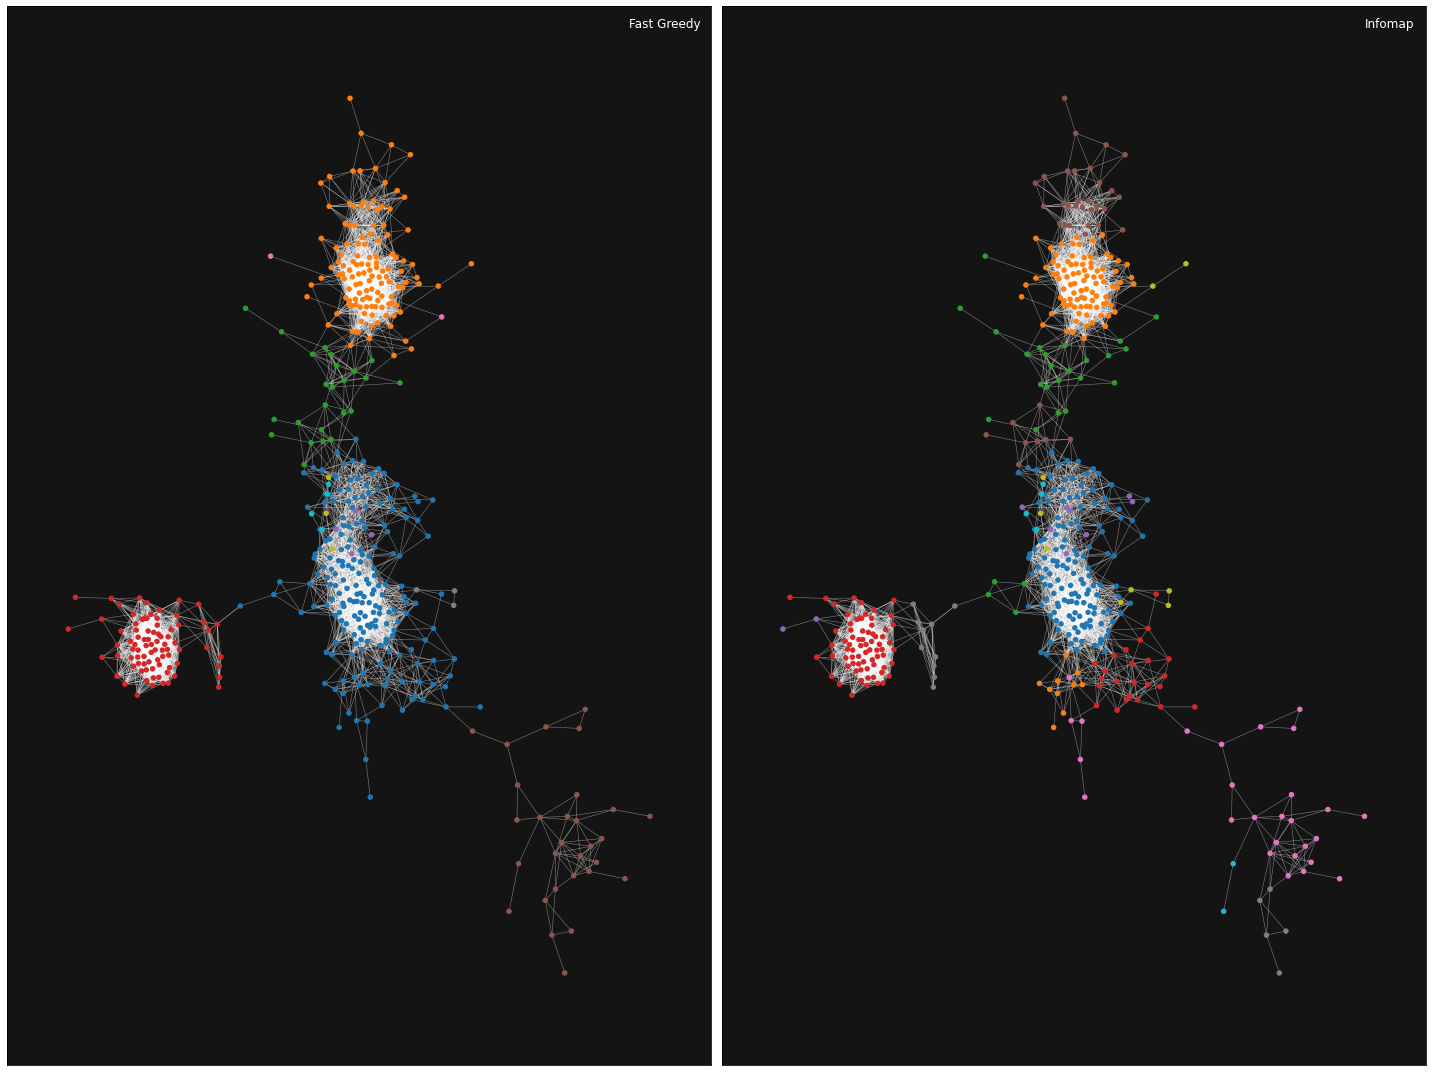

In [29]:
#graficamos
titles = ['Fast Greedy', 'Infomap']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,15))
# fig.set_facecolor('#141414')
particion_lista = [particion_fast_greedy, particion_infomap]

for i, ax in enumerate(fig.axes):
	ax.set_facecolor('#141414')
	nx.draw_networkx_nodes(Red_CG, posiciones, particion_lista[i].keys(), ax = ax, node_size=20, cmap=cmap, node_color = list(particion_lista[i].values()))
	
	nx.draw_networkx_edges(Red_CG, pos = posiciones, ax = ax, alpha = .5, edge_color = 'white', width=0.5)
	
	ax.axis('on')
	ax.legend([titles[i]], loc='upper right', frameon=False, fontsize=12, labelcolor='white', markerscale=0.01)

plt.tight_layout()


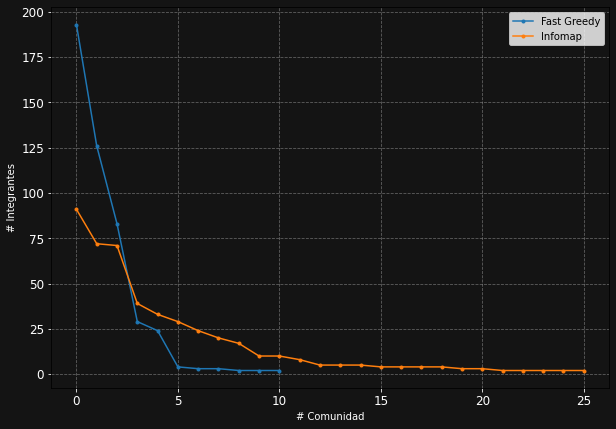

In [31]:
# Granularidad
particiones = [particion_fast_greedy, particion_infomap]
titles = ['Fast Greedy', 'Infomap']

fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (10, 7))
fig.set_facecolor('#141414')
ax.set_facecolor('#141414')
ax.tick_params(axis='x', labelsize=12, colors='white')
ax.tick_params(axis='y', labelsize=12, colors='white')


for jj in range(len(particiones)):
    dic = particiones[jj]
    v, c  = dict_to_vc(dic)
    ax.plot(range(len(c)), sorted(c, reverse = True), marker = '.', label = titles[jj])
    plt.xlabel('# Comunidad', color = 'white')	
    plt.ylabel('# Integrantes', color = 'white')

plt.grid(True, linestyle = '--', alpha = .5)
plt.legend()